# Results

In [155]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [156]:
df = pd.read_csv("../data/combined_data.csv")
df.head()

,Country,Region,Year,Status,PR rating,CL rating,PR,CL,Total,Gross enrollment ratio - Lower secondary level (female),...,GDP real rates of growth (percent),Population aged 0 to 14 years old (percentage),Population aged 60+ years old (percentage),Population density,Population mid-year estimates (millions),Population mid-year estimates for females (millions),Population mid-year estimates for males (millions),Sex ratio (males per 100 females),Surface area (thousand km2),Percentage of individuals using the internet
0,Afghanistan,Asia,2015,NF,6,6,11,13,24,47.0,...,-2.5,46.3,3.7,52.1,33.83,16.73,17.1,102.2,NaN,8.3
1,Afghanistan,Asia,2018,NF,5,6,12,14,26,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Asia,2019,NF,5,6,13,14,27,53.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Asia,2020,NF,5,6,13,14,27,NaN,...,-2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Asia,2021,NF,5,6,13,14,27,NaN,...,-20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
vars = df.columns[9:]

country_means = df.groupby('Country')[vars].mean()

region_means = df.groupby('Region')[vars].mean()

def impute(row):
    for var in vars:
        if pd.isna(row[var]):
            country = row["Country"]
            region = row["Region"]

            if not pd.isna(country_means.loc[country, var]):
                row[var] = country_means.loc[country, var]

            elif not pd.isna(region_means.loc[region, var]):
                row[var] = region_means.loc[region, var]

    return row

df_imputed = df.apply(impute, axis = 1)
df_imputed = df_imputed.dropna(subset = vars)
df_imputed.head()

,Country,Region,Year,Status,PR rating,CL rating,PR,CL,Total,Gross enrollment ratio - Lower secondary level (female),...,GDP real rates of growth (percent),Population aged 0 to 14 years old (percentage),Population aged 60+ years old (percentage),Population density,Population mid-year estimates (millions),Population mid-year estimates for females (millions),Population mid-year estimates for males (millions),Sex ratio (males per 100 females),Surface area (thousand km2),Percentage of individuals using the internet
0,Afghanistan,Asia,2015,NF,6,6,11,13,24,47.000000,...,-2.500,46.300000,3.7,52.1,33.83,16.730000,17.100000,102.200000,653.0,8.3
1,Afghanistan,Asia,2018,NF,5,6,12,14,26,52.000000,...,-7.875,44.266667,3.8,60.1,39.02,19.316667,19.703333,102.033333,653.0,8.3
2,Afghanistan,Asia,2019,NF,5,6,13,14,27,53.800000,...,-7.875,44.266667,3.8,60.1,39.02,19.316667,19.703333,102.033333,653.0,8.3
3,Afghanistan,Asia,2020,NF,5,6,13,14,27,50.933333,...,-2.100,44.266667,3.8,60.1,39.02,19.316667,19.703333,102.033333,653.0,8.3
4,Afghanistan,Asia,2021,NF,5,6,13,14,27,50.933333,...,-20.700,44.266667,3.8,60.1,39.02,19.316667,19.703333,102.033333,653.0,8.3


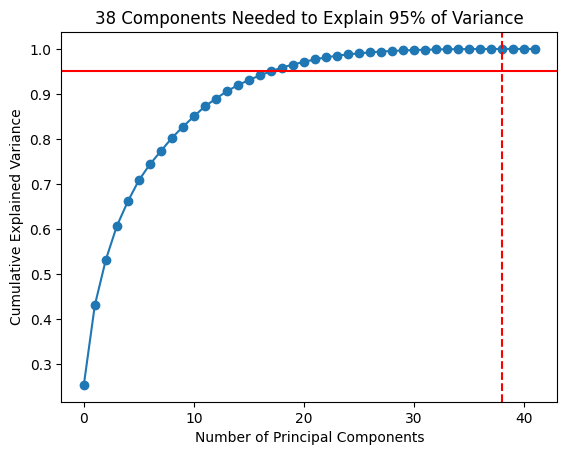

In [158]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_imputed.iloc[:, 9:]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cum_var >= 0.9999) + 1

plt.figure()

plt.plot(cum_var, marker = 'o')
plt.axvline(x = n_components_95, color = 'red', linestyle = '--')
plt.axhline(y = 0.95, color = 'red')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title(f'{n_components_95} Components Needed to Explain 95% of Variance')
plt.show()

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_imputed.iloc[:, 9:]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components = n_components_95).fit(X_scaled)

X_pca = pca.transform(X_scaled)
y = df_imputed.iloc[:, 8]

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 42)

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(f"R^2 Score: {r2_score(y_test, y_pred):.3f}")
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

R^2 Score: 0.671
Mean Squared Error: 16.940


In [160]:
X = df_imputed.iloc[:, 9:]
y = df_imputed.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
reg = LinearRegression().fit(X_train, y_train)


reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(f"R^2 Score: {r2_score(y_test, y_pred):.3f}")
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

R^2 Score: 0.668
Mean Squared Error: 17.016


In [161]:
coefficients = reg.coef_
feature_names = X.columns

coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coeff_df.sort_values(by = "Coefficient", ascending = True).head(10)


,Feature,Coefficient
36,Population mid-year estimates (millions),-80.461539
12,Labour force participation - Total,-5.580409
19,Percentage of male and female intentional homi...,-2.135328
13,Unemployment rate - Female,-1.537925
3,Gross enrollment ratio - Primary (male),-0.535559
9,"Seats held by women in national parliament, as...",-0.429584
5,Gross enrollment ratio - Upper secondary level...,-0.386015
25,"Safely managed drinking water sources, urban (...",-0.275959
20,Percentage of male and female intentional homi...,-0.274788
18,"Kidnapping at the national level, rate per 100...",-0.253881
